In [15]:
import pandas as pd
%matplotlib inline
from matplotlib import pylab as plt
import numpy as np

In [16]:
data = pd.read_csv('monthly-milk-production.csv',sep=';', header=0, parse_dates=['month'],
                  index_col=['month'], dayfirst=True)
data.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


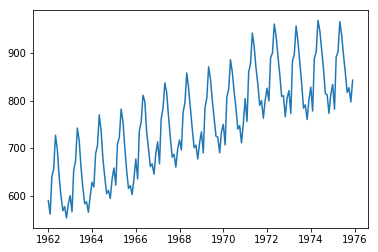

In [17]:
#plt.figure(figsize=(10, 12))
_ = plt.plot(data.index.values, data.iloc[:,0].values)

In [4]:
import statsmodels.api as sm
round(sm.tsa.stattools.adfuller(data.iloc[:,0].values)[1], 2)

0.63

In [19]:
data['daily'] = data.values.flatten() / data.index.days_in_month

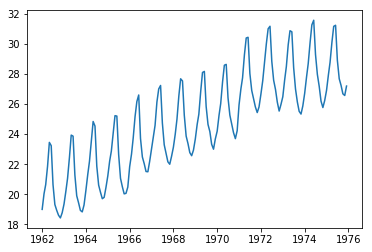

In [6]:
#plt.figure(figsize=(10, 12))
_ = plt.plot(data.index.values, data.iloc[:,1].values)

In [7]:
round(sum(data.iloc[:,1].values), 2)

4166.33

0.06430054654174293

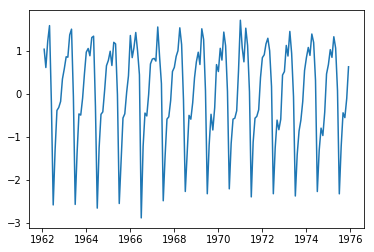

In [39]:
data.daily_diff1 = data.daily - data.daily.shift(1)
_ = plt.plot(data.index.values, data.daily_diff1.values)
sm.tsa.stattools.adfuller(data.daily_diff1.dropna())[1]

0.22127672658830383

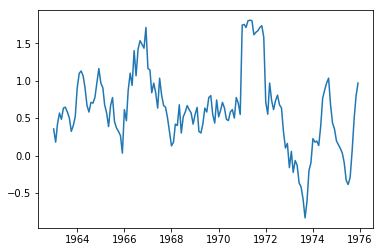

In [40]:
data.daily_diff12 = data.daily - data.daily.shift(12)
_ = plt.plot(data.index.values, data.daily_diff12.values)
sm.tsa.stattools.adfuller(data.daily_diff12.dropna())[1]

2.2808455518036712e-06

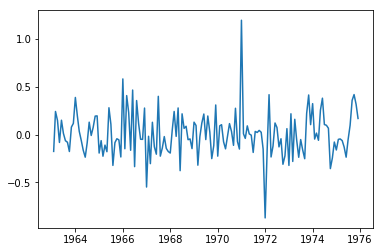

In [41]:
data.daily_diff1_12 = data.daily_diff12 - data.daily_diff12.shift(1)
_ = plt.plot(data.index.values, data.daily_diff1_12.values)
sm.tsa.stattools.adfuller(data.daily_diff1_12.dropna())[1]

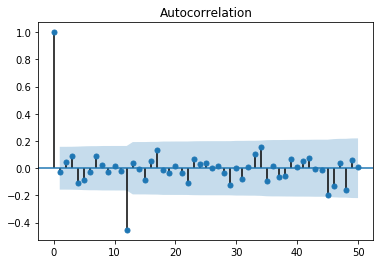

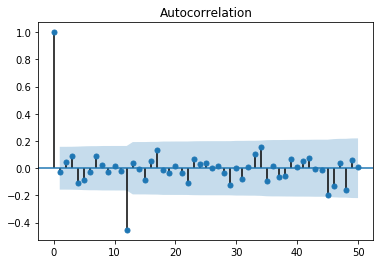

In [46]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data.daily_diff1_12.dropna().values.squeeze(), lags=50)

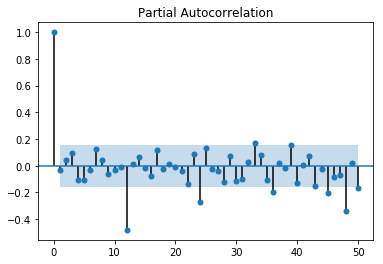

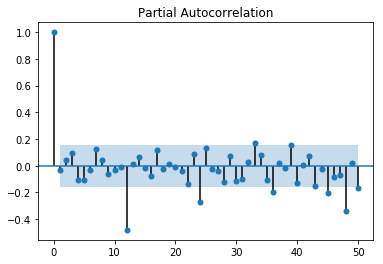

In [47]:
sm.graphics.tsa.plot_pacf(data.daily_diff1_12.dropna().values.squeeze(), lags=50)